In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import bokeh
import altair as alt
import ggplot as gg
import folium

# Load the dataset
df = pd.read_csv("/kaggle/input/mental-health-insights-vulnerable-cancer-patients/Mental Health Dataset.csv")

# Display the first few rows of the dataset
df.head()


,posts,predicted,intensity
0,I know as parent of child with down syndrome t...,negative,-1
1,but in my heart I know this is the future prom...,neutral,0
2,I have mylefibrosis which turn to leukemia the...,negative,-1
3,from one of my health group subject wayne dyer...,neutral,0
4,gmos now link to leukemia http nsnbc I 2013 07...,neutral,0


In [2]:
# Count the number of posts in the dataset
num_posts = len(df)
print(f'The dataset contains {num_posts} posts.')

The dataset contains 10392 posts.


In [3]:
# Display unique values in the 'predicted' column
unique_predicted_values = df['predicted'].unique()
print('Unique values in the "predicted" column:', unique_predicted_values)


Unique values in the "predicted" column: ['negative' 'neutral' 'positive' 'very negative']


**What is the distribution of emotions predicted in the dataset?**

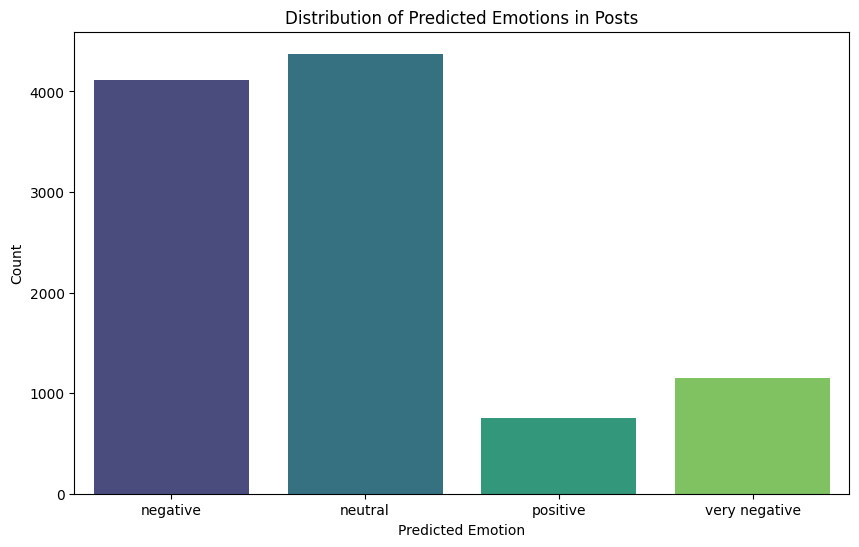

In [4]:
# Plot a bar chart to show the distribution of predicted emotions
plt.figure(figsize=(10, 6))
sns.countplot(x='predicted', data=df, palette='viridis')
plt.title('Distribution of Predicted Emotions in Posts')
plt.xlabel('Predicted Emotion')
plt.ylabel('Count')
plt.show()


**How is the intensity of emotions distributed in the dataset?**

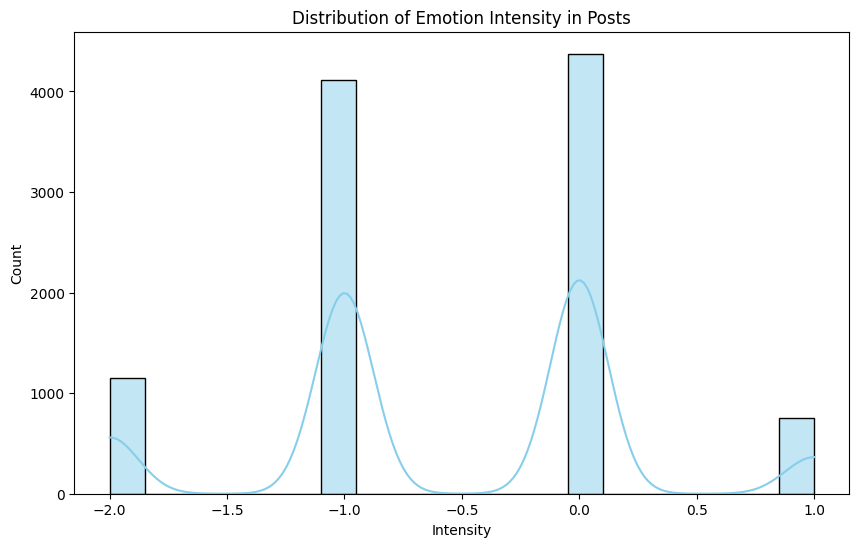

In [5]:
# Plot a histogram to show the distribution of intensity
plt.figure(figsize=(10, 6))
sns.histplot(df['intensity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Emotion Intensity in Posts')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.show()


**Can we visualize the distribution of emotions and intensity using Plotly?**

In [6]:
# Use Plotly to create a sunburst chart for emotions and intensity
fig = px.sunburst(df, path=['predicted', 'intensity'], title='Sunburst Chart of Emotions and Intensity')
fig.show()


**Are there any correlations between predicted emotions and intensity?**

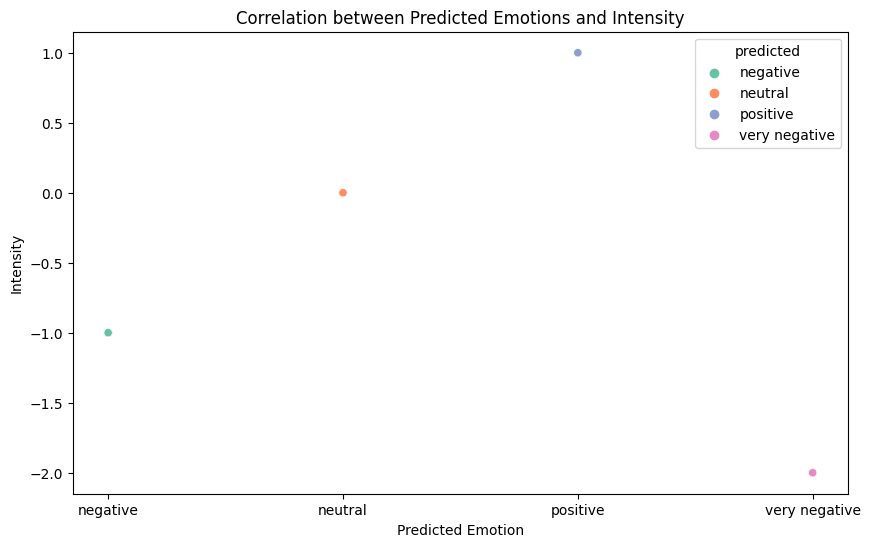

In [7]:
# Plot a scatter plot to explore the correlation between predicted emotions and intensity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='predicted', y='intensity', data=df, hue='predicted', palette='Set2')
plt.title('Correlation between Predicted Emotions and Intensity')
plt.xlabel('Predicted Emotion')
plt.ylabel('Intensity')
plt.show()


**What are the top words used in the posts?**

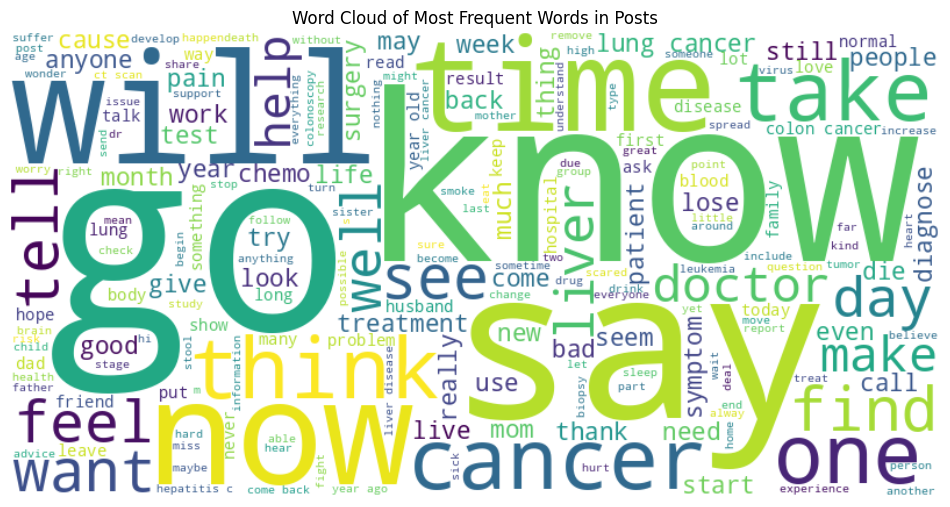

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the 'posts' column to strings
df['posts'] = df['posts'].astype(str)

# Generate a WordCloud to visualize the most frequent words in the posts
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(df['posts']))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words in Posts')
plt.show()


In [9]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print('Missing values in the dataset:\n', missing_values)

Missing values in the dataset:
 posts        0
predicted    0
intensity    0
dtype: int64


In [10]:
# Handle missing values by dropping rows with missing values
df_cleaned = df.dropna()

# Display the shape of the cleaned dataset
print('Shape of the cleaned dataset:', df_cleaned.shape)


Shape of the cleaned dataset: (10392, 3)


**How has the removal of missing values affected the distribution of emotions?**

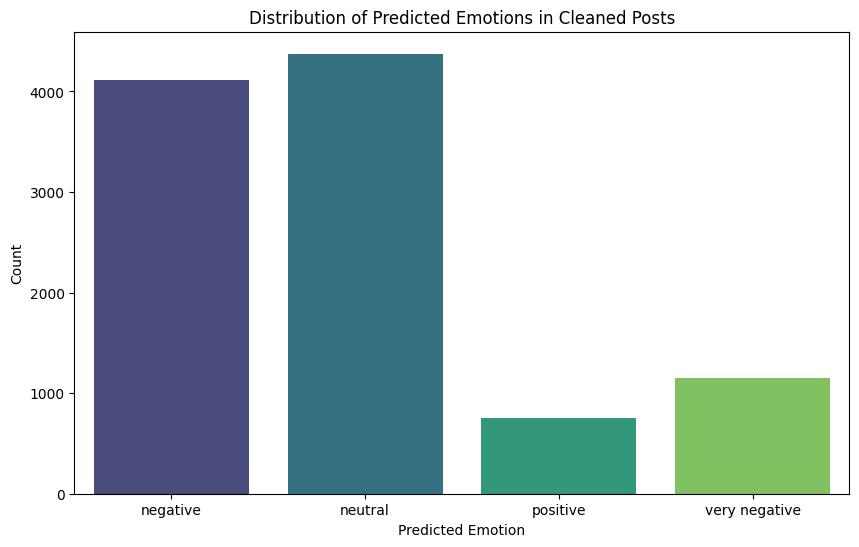

In [11]:
# Plot the distribution of predicted emotions in the cleaned dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='predicted', data=df_cleaned, palette='viridis')
plt.title('Distribution of Predicted Emotions in Cleaned Posts')
plt.xlabel('Predicted Emotion')
plt.ylabel('Count')
plt.show()


**Can we explore the distribution of intensity after handling missing values?**

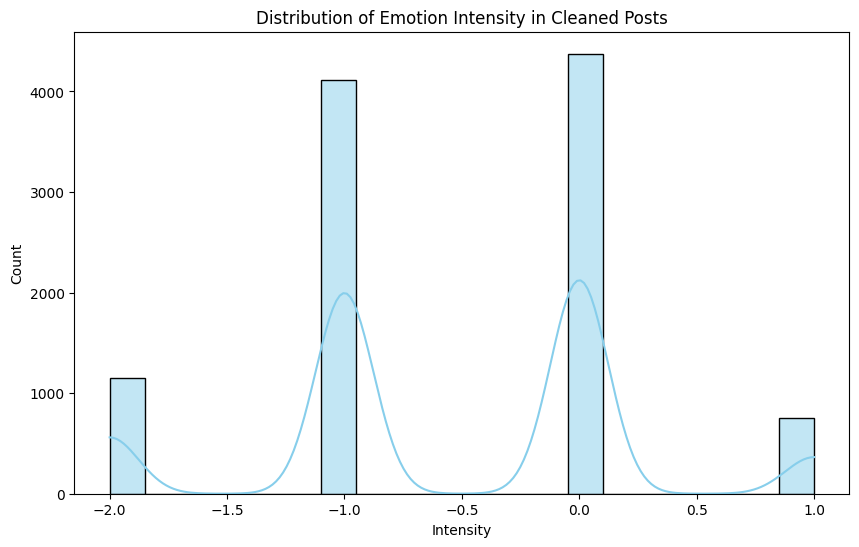

In [12]:
# Plot the histogram of intensity in the cleaned dataset
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['intensity'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Emotion Intensity in Cleaned Posts')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.show()


**How does the word cloud look after cleaning the dataset?**

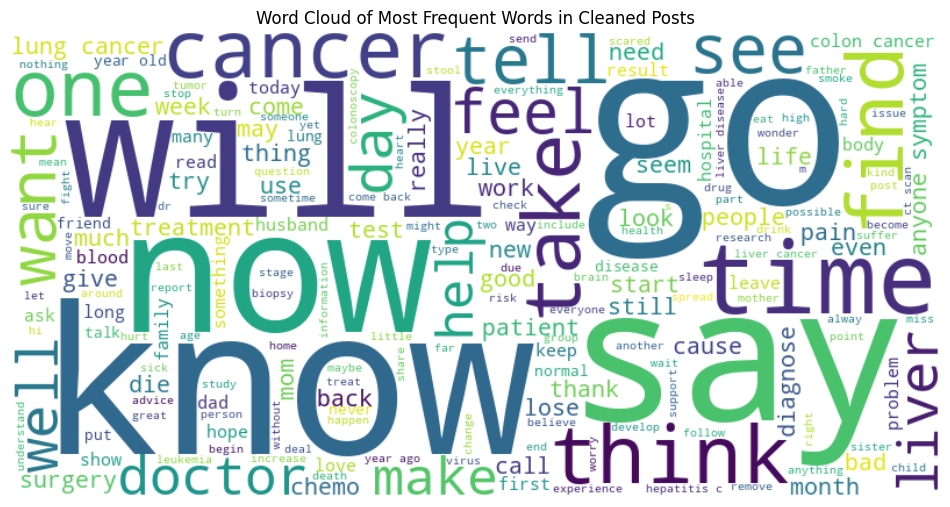

In [13]:
# Generate a WordCloud for the cleaned dataset
wordcloud_cleaned = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(df_cleaned['posts']))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud_cleaned, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words in Cleaned Posts')
plt.show()


**What is the average intensity of emotions for each predicted category?**

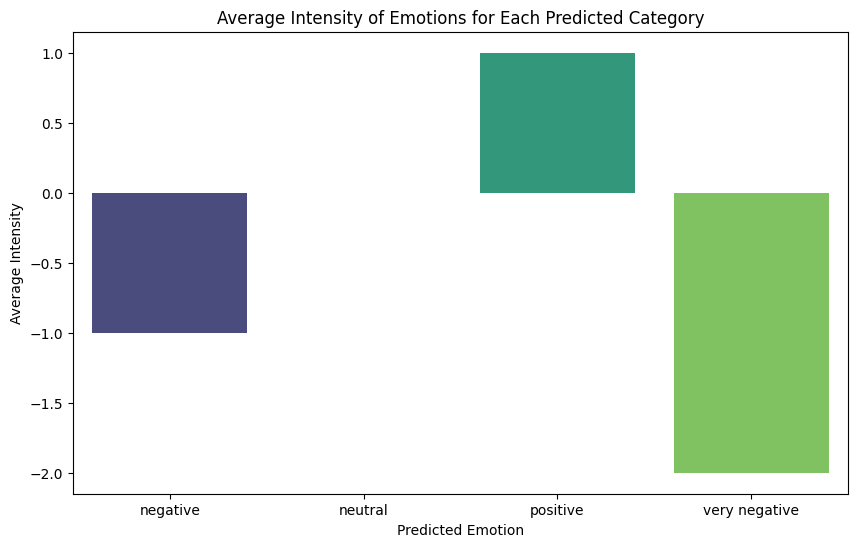

In [14]:
# Calculate the average intensity for each predicted category
average_intensity_by_predicted = df_cleaned.groupby('predicted')['intensity'].mean().reset_index()

# Plot a bar chart to show the average intensity for each predicted category
plt.figure(figsize=(10, 6))
sns.barplot(x='predicted', y='intensity', data=average_intensity_by_predicted, palette='viridis')
plt.title('Average Intensity of Emotions for Each Predicted Category')
plt.xlabel('Predicted Emotion')
plt.ylabel('Average Intensity')
plt.show()


**What are the most common n-grams in the posts?**

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Tokenize and find the most common n-grams in the posts
vectorizer = CountVectorizer(ngram_range=(1, 3), stop_words='english')
X = vectorizer.fit_transform(df_cleaned['posts'])
feature_names = vectorizer.get_feature_names_out()
word_frequencies = pd.DataFrame(zip(feature_names, np.asarray(X.sum(axis=0)).ravel()), columns=['n-gram', 'frequency'])

# Display the top 10 most common n-grams
top_ngrams = word_frequencies.sort_values(by='frequency', ascending=False).head(10)
print('Top 10 Most Common N-grams:\n', top_ngrams)



Top 10 Most Common N-grams:
          n-gram  frequency
186142   cancer      16289
718736    liver      10020
647600     just       8978
1371734    year       8804
663599     know       8523
1060082     say       7851
1239406    time       6862
315947      day       6084
749523     lung       5935
701584     like       5900


**Can we visualize the distribution of post lengths?**

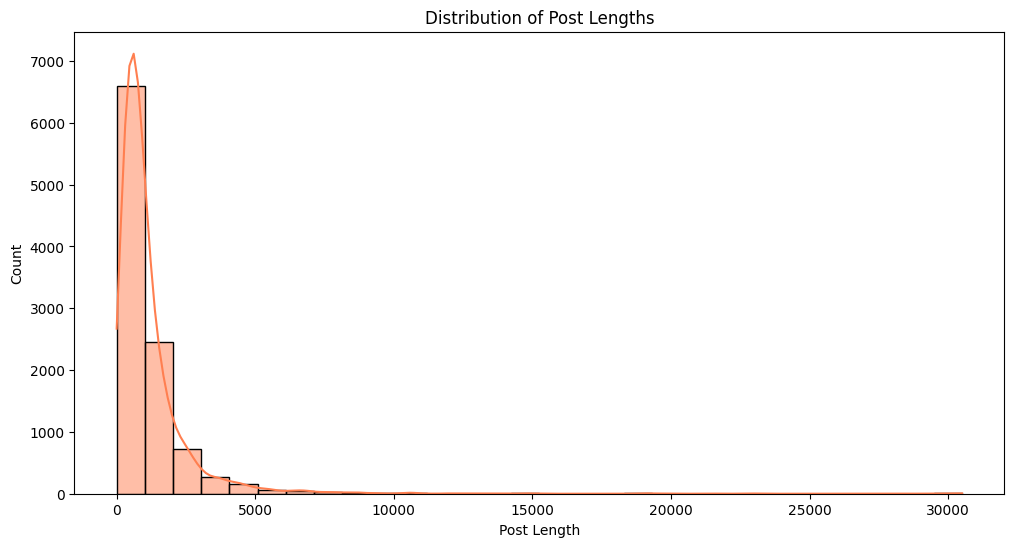

In [16]:
# Create a new column 'post_length' representing the length of each post
df_cleaned['post_length'] = df_cleaned['posts'].apply(len)

# Plot a histogram to visualize the distribution of post lengths
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['post_length'], bins=30, kde=True, color='coral')
plt.title('Distribution of Post Lengths')
plt.xlabel('Post Length')
plt.ylabel('Count')
plt.show()


**What is the correlation between post length and emotional intensity?**

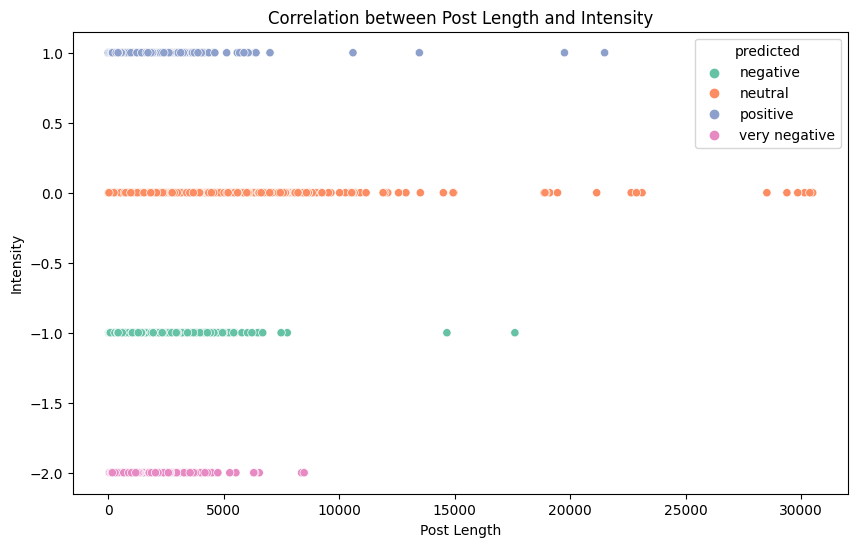

In [17]:
# Plot a scatter plot to explore the correlation between post length and intensity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='post_length', y='intensity', data=df_cleaned, hue='predicted', palette='Set2')
plt.title('Correlation between Post Length and Intensity')
plt.xlabel('Post Length')
plt.ylabel('Intensity')
plt.show()


**Can we visualize the top predictive words for each emotion category?**

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit a TF-IDF vectorizer to identify the most predictive words
vectorizer_tfidf = TfidfVectorizer(max_features=2000, stop_words='english')
X_tfidf = vectorizer_tfidf.fit_transform(df_cleaned['posts'])
feature_names_tfidf = vectorizer_tfidf.get_feature_names_out()

# Identify the top predictive words for each emotion category
top_predictive_words = pd.DataFrame({
    'predicted': df_cleaned['predicted'],
    'top_word': feature_names_tfidf[X_tfidf.argmax(axis=1)].tolist()
})

# Display the top predictive words for each emotion category
print('Top Predictive Words for Each Emotion Category:\n', top_predictive_words.head(10))


Top Predictive Words for Each Emotion Category:
   predicted    top_word
0  negative     [child]
1   neutral      [cure]
2  negative  [leukemia]
3   neutral        [dr]
4   neutral      [link]
5   neutral  [leukemia]
6   neutral  [mutation]
7   neutral       [age]
8   neutral      [link]
9   neutral    [marrow]


**What are the most common words in the posts for each predicted emotion category?**

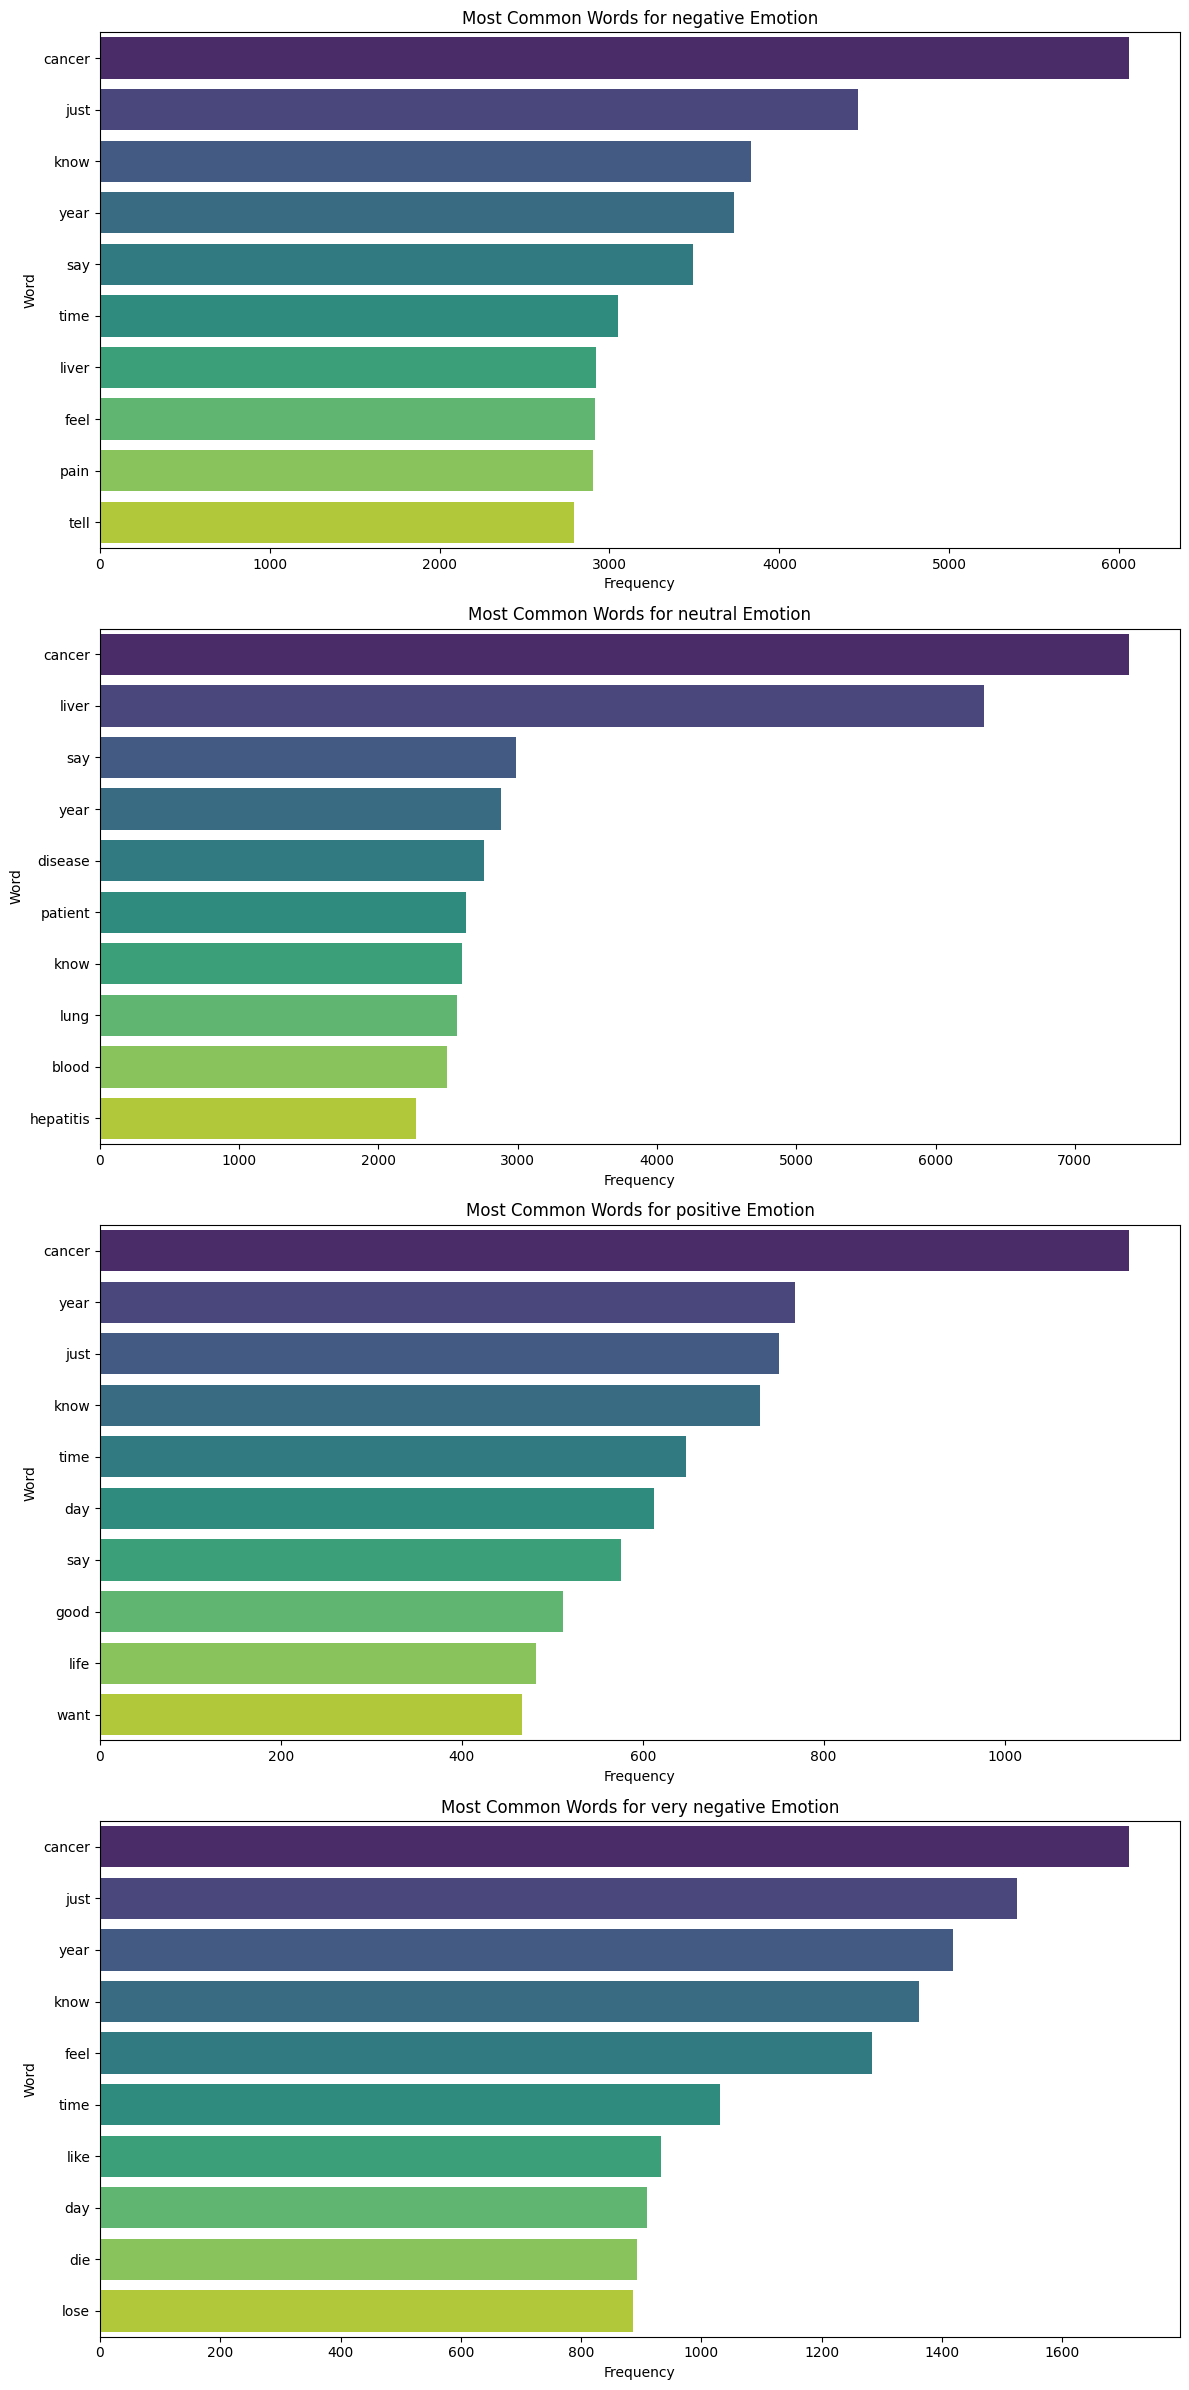

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

# Separate the dataset based on predicted emotion categories
emotion_categories = df_cleaned['predicted'].unique()

# Create subplots to display the most common words for each predicted emotion
fig, axes = plt.subplots(nrows=len(emotion_categories), figsize=(12, 6 * len(emotion_categories)))

for i, emotion in enumerate(emotion_categories):
    subset = df_cleaned[df_cleaned['predicted'] == emotion]
    vectorizer_words = CountVectorizer(max_features=10, stop_words='english')
    X_words = vectorizer_words.fit_transform(subset['posts'])
    feature_names_words = vectorizer_words.get_feature_names_out()
    word_frequencies_words = pd.DataFrame(zip(feature_names_words, np.asarray(X_words.sum(axis=0)).ravel()), columns=['word', 'frequency'])
    word_frequencies_words = word_frequencies_words.sort_values(by='frequency', ascending=False)
    
    sns.barplot(x='frequency', y='word', data=word_frequencies_words, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Most Common Words for {emotion} Emotion')
    axes[i].set_xlabel('Frequency')
    axes[i].set_ylabel('Word')

plt.tight_layout()
plt.show()


**What are the most common bigrams in the posts?**

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Tokenize and find the most common bigrams in the posts
vectorizer_bigrams = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=10)
X_bigrams = vectorizer_bigrams.fit_transform(df_cleaned['posts'])
feature_names_bigrams = vectorizer_bigrams.get_feature_names_out()
bigram_frequencies = pd.DataFrame(zip(feature_names_bigrams, np.asarray(X_bigrams.sum(axis=0)).ravel()), columns=['bigram', 'frequency'])
bigram_frequencies = bigram_frequencies.sort_values(by='frequency', ascending=False)

# Display the top 10 most common bigrams
print('Top 10 Most Common Bigrams:\n', bigram_frequencies)


Top 10 Most Common Bigrams:
           bigram  frequency
6    lung cancer       3124
0   colon cancer       1861
9       year old       1496
2      feel like       1331
8       year ago       1251
1        ct scan       1118
4   liver cancer        961
5  liver disease        878
3       http www        765
7      month ago        736


**What are the most common trigrams in the posts?**

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

# Tokenize and find the most common trigrams in the posts
vectorizer_trigrams = CountVectorizer(ngram_range=(3, 3), stop_words='english', max_features=10)
X_trigrams = vectorizer_trigrams.fit_transform(df_cleaned['posts'])
feature_names_trigrams = vectorizer_trigrams.get_feature_names_out()
trigram_frequencies = pd.DataFrame(zip(feature_names_trigrams, np.asarray(X_trigrams.sum(axis=0)).ravel()), columns=['trigram', 'frequency'])
trigram_frequencies = trigram_frequencies.sort_values(by='frequency', ascending=False)

# Display the top 10 most common trigrams
print('Top 10 Most Common Trigrams:\n', trigram_frequencies)


Top 10 Most Common Trigrams:
                         trigram  frequency
9             stage lung cancer        210
2      chronic fatigue syndrome        200
4          diagnose lung cancer        196
5               die lung cancer        181
1              cell lung cancer        177
7               small cell lung        166
8            stage colon cancer        153
3         diagnose colon cancer        136
6  http mysisterdalesgarden com        116
0               cancer year ago        115


**Can we visualize the correlation matrix of numerical features?**

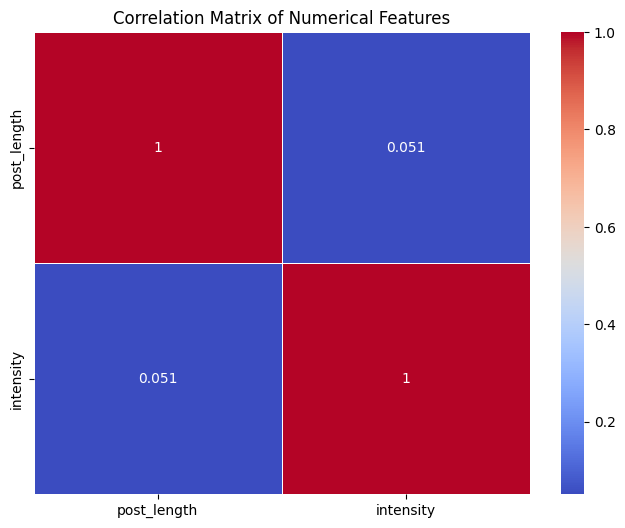

In [22]:
# Create a correlation matrix of numerical features
correlation_matrix = df_cleaned[['post_length', 'intensity']].corr()

# Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


**How does the distribution of post lengths vary for each predicted emotion category?**

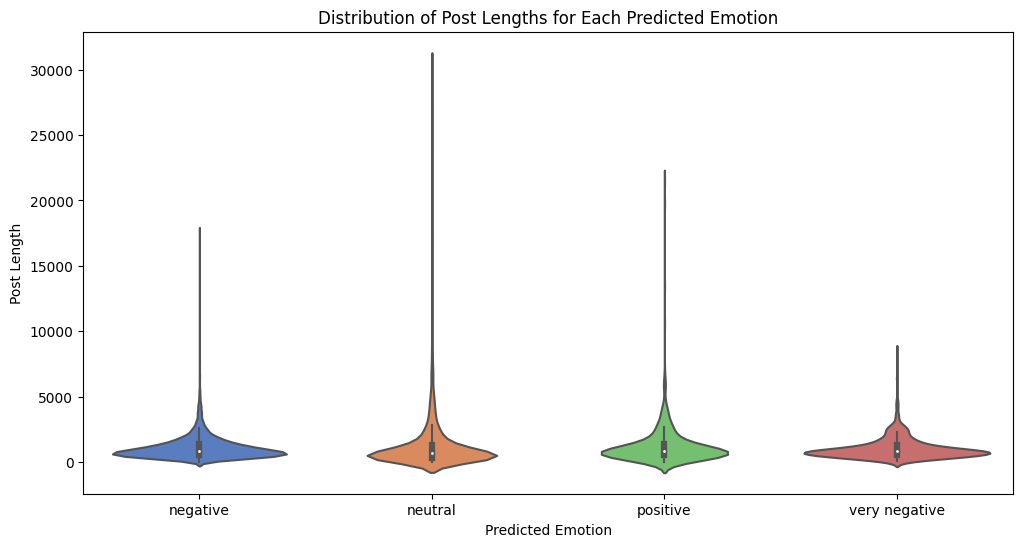

In [23]:
# Use Violin plot to show the distribution of post lengths for each predicted emotion
plt.figure(figsize=(12, 6))
sns.violinplot(x='predicted', y='post_length', data=df_cleaned, palette='muted')
plt.title('Distribution of Post Lengths for Each Predicted Emotion')
plt.xlabel('Predicted Emotion')
plt.ylabel('Post Length')
plt.show()


**Can we explore the relationship between emotional intensity and post length using a jointplot?**

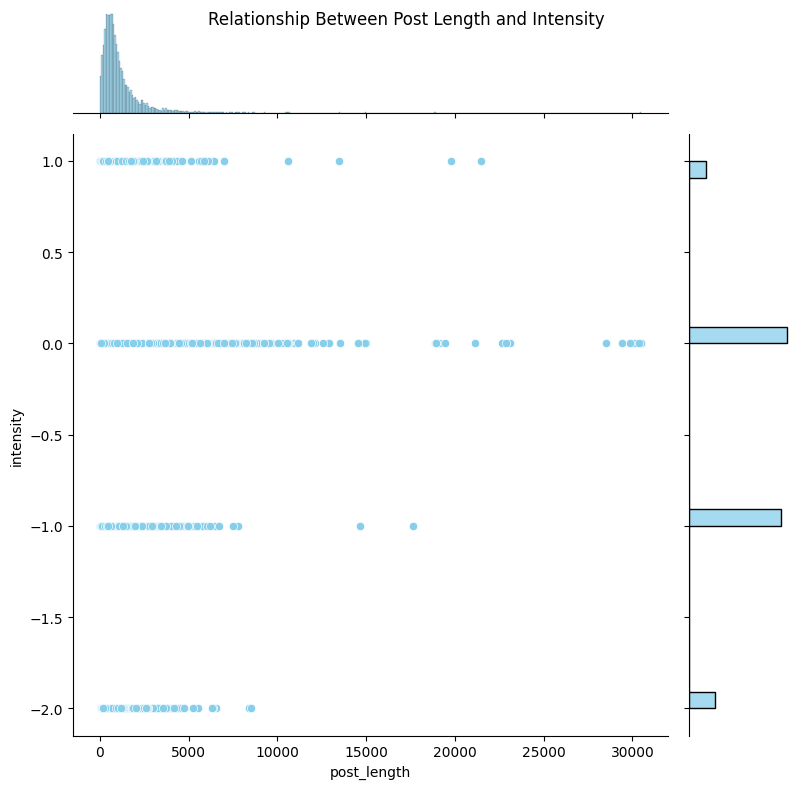

In [24]:
# Use a jointplot to explore the relationship between post length and intensity
sns.jointplot(x='post_length', y='intensity', data=df_cleaned, kind='scatter', height=8, color='skyblue')
plt.suptitle('Relationship Between Post Length and Intensity')
plt.show()


**Can we visualize the distribution of post lengths and emotional intensities using a pair plot?**

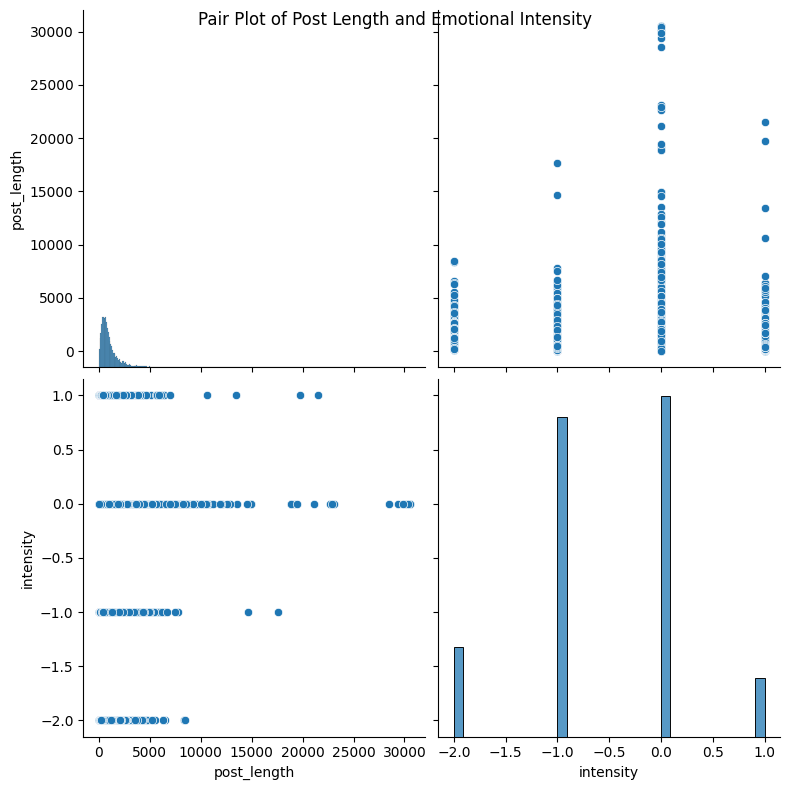

In [25]:
# Create a pair plot to visualize the relationships between post length and emotional intensity
sns.pairplot(df_cleaned[['post_length', 'intensity']], height=4)
plt.suptitle('Pair Plot of Post Length and Emotional Intensity')
plt.show()



**What is the proportion of each predicted emotion category in the dataset?**

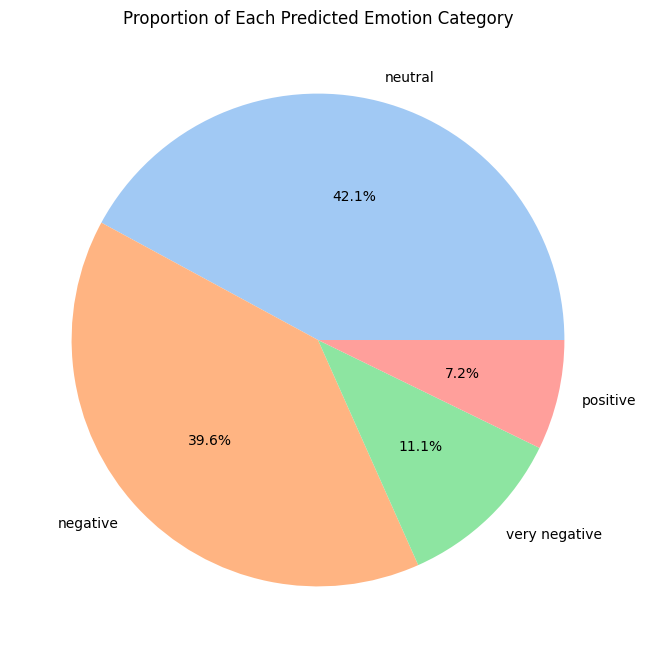

In [26]:
# Use a pie chart to visualize the proportion of each predicted emotion category
emotion_counts = df_cleaned['predicted'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportion of Each Predicted Emotion Category')
plt.show()


**Can we visualize the average post length for each predicted emotion category using a bar chart?**

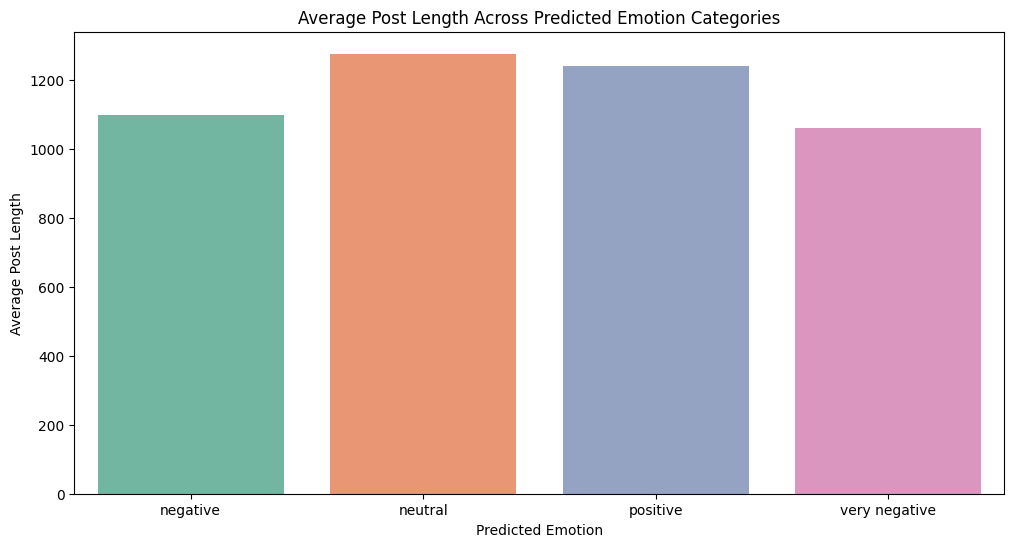

In [27]:
# Use a bar plot to show the average post length for each predicted emotion category
plt.figure(figsize=(12, 6))
sns.barplot(x='predicted', y='post_length', data=df_cleaned, palette='Set2', errorbar=None)
plt.title('Average Post Length Across Predicted Emotion Categories')
plt.xlabel('Predicted Emotion')
plt.ylabel('Average Post Length')
plt.show()


**Can we visualize the average emotional intensity for each predicted emotion category using a point plot?**

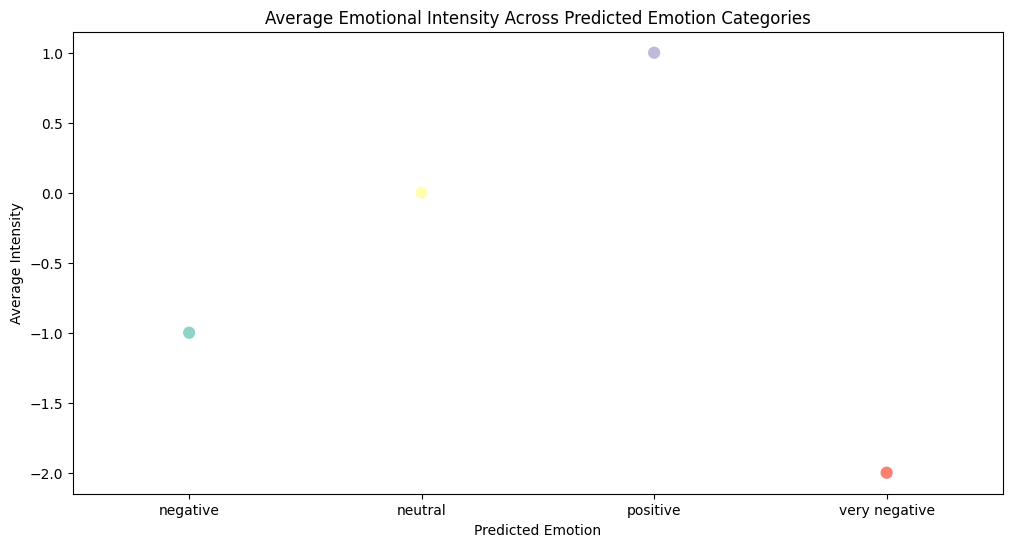

In [28]:
# Use a point plot to show the average emotional intensity for each predicted emotion category
plt.figure(figsize=(12, 6))
sns.pointplot(x='predicted', y='intensity', data=df_cleaned, palette='Set3', errorbar=None)
plt.title('Average Emotional Intensity Across Predicted Emotion Categories')
plt.xlabel('Predicted Emotion')
plt.ylabel('Average Intensity')
plt.show()


**Can we visualize the emotional intensity over time using a line plot with a confidence interval?**

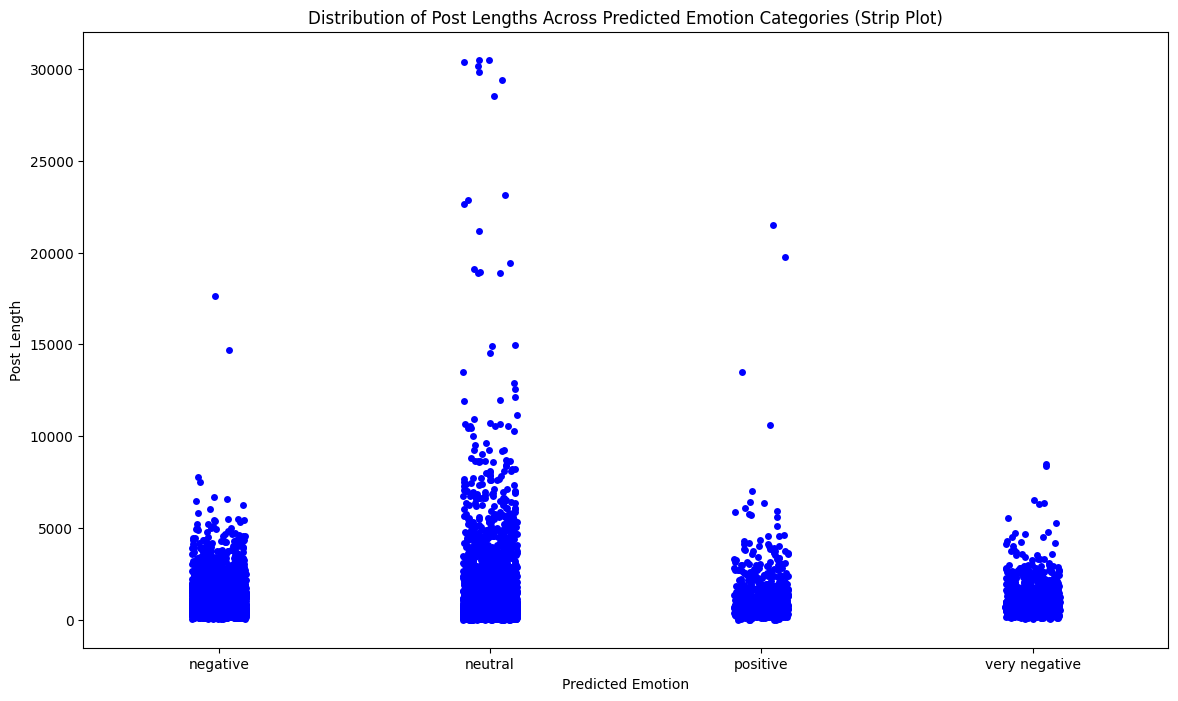

In [29]:
# Use a strip plot to visualize the distribution of post lengths for each predicted emotion category
plt.figure(figsize=(14, 8))
sns.stripplot(x='predicted', y='post_length', data=df_cleaned, marker='o', color='blue')
plt.title('Distribution of Post Lengths Across Predicted Emotion Categories (Strip Plot)')
plt.xlabel('Predicted Emotion')
plt.ylabel('Post Length')
plt.show()
